In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pymc as pm
import arviz as az
az.style.use('arviz-darkgrid')

## Discriminative models

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = iris.query("species == ('setosa', 'versicolor')")
x_0 = df['sepal_length'].values
x_c = x_0 - x_0.mean()
y_0 = pd.Categorical(df['species']).codes

In [5]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sd=10, shape=2)
    σ = pm.HalfNormal('σ', 10)
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=μ[1], sd=σ,
                           observed=x_0[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    # trace_lda = pm.sample(1000, return_inferencedata=True)
    # trace_lda.to_netcdf("data/ch7/iris_lda.nc")
    trace_lda = az.from_netcdf("../../data-pymc/ch7/iris_lda.nc")

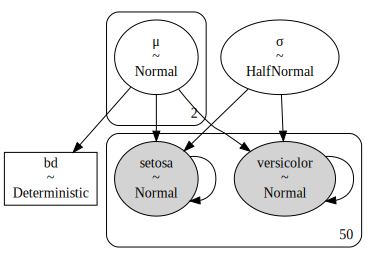

In [6]:
pm.model_to_graphviz(lda)

In [7]:
az.summary(trace_lda)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.005,0.065,4.875,5.119,0.001,0.001,2691.0,1314.0,1.0
μ[1],5.936,0.065,5.816,6.052,0.001,0.001,2594.0,1468.0,1.0
σ,0.447,0.033,0.386,0.508,0.001,0.000,2477.0,1484.0,1.0
bd,5.470,0.045,5.382,5.552,0.001,0.001,2446.0,1351.0,1.0


In [8]:
az.summary(trace_lda).to_markdown()

'|      |   mean |    sd |   hdi_3% |   hdi_97% |   mcse_mean |   mcse_sd |   ess_bulk |   ess_tail |   r_hat |\n|:-----|-------:|------:|---------:|----------:|------------:|----------:|-----------:|-----------:|--------:|\n| μ[0] |  5.005 | 0.065 |    4.875 |     5.119 |       0.001 |     0.001 |       2691 |       1314 |       1 |\n| μ[1] |  5.936 | 0.065 |    5.816 |     6.052 |       0.001 |     0.001 |       2594 |       1468 |       1 |\n| σ    |  0.447 | 0.033 |    0.386 |     0.508 |       0.001 |     0     |       2477 |       1484 |       1 |\n| bd   |  5.47  | 0.045 |    5.382 |     5.552 |       0.001 |     0.001 |       2446 |       1351 |       1 |'

[Text(0.5, 0, 'sepal_length'), Text(0, 0.5, 'θ')]

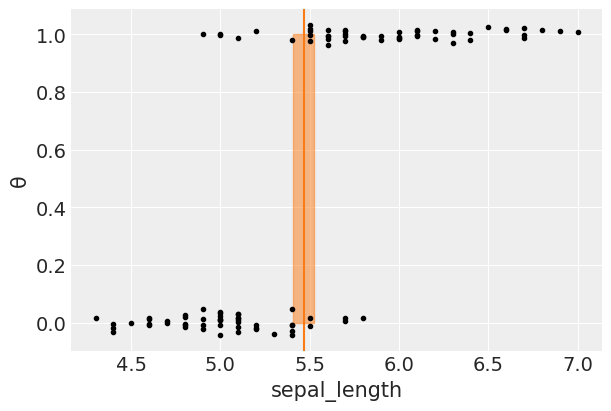

In [9]:
bd = trace_lda.posterior['bd'].mean(axis=0)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(x_0, np.random.normal(y_0, 0.02), '.', color='k')

ax.axvline(bd.mean(axis=0), ymax=1, color='C1')
bd_hpd = az.hdi(bd.values)
ax.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='C1', alpha=0.5)

ax.set(xlabel='sepal_length', ylabel='θ')
# plt.savefig('images/ch7/iris_lda.png')

In [10]:
az.summary(trace_lda)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.005,0.065,4.875,5.119,0.001,0.001,2691.0,1314.0,1.0
μ[1],5.936,0.065,5.816,6.052,0.001,0.001,2594.0,1468.0,1.0
σ,0.447,0.033,0.386,0.508,0.001,0.000,2477.0,1484.0,1.0
bd,5.470,0.045,5.382,5.552,0.001,0.001,2446.0,1351.0,1.0
